In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# with open(f'../../loss/ResDepth_addition_v0.pkl', 'rb') as f:
#         experiment_data_v0 = pickle.load(f)

# with open(f'../../loss/ResDepth_addition_v1.pkl', 'rb') as f:
#         experiment_data_v1 = pickle.load(f)

# experiment_data = experiment_data_v0

# experiment_data['r0_baseline'] = experiment_data_v0['r0_baseline'] + experiment_data_v1['r0_baseline']
# for key, value in experiment_data_v1['r1'].items():
#     experiment_data['r1'][key] = experiment_data_v0['r1'][key] + value

In [1]:
with open(f'../../../loss/ResDepth_addition_v2.pkl', 'rb') as f:
        experiment_data = pickle.load(f)

NameError: name 'pickle' is not defined

In [69]:
np.mean(experiment_data['r0_baseline'])

0.0013421708077657967

In [50]:
for key, value in experiment_data['r1'].items():
    print(f'{key}, mean: {np.mean(value)}, std: {np.std(value)}')
    stat_val, p_val = ttest_ind(experiment_data['r0_baseline'], value, equal_var=False)
    print(p_val)

('green',), mean: 0.0012550952174933626, std: 0.00016222980016583402
0.09633008841464105
('red',), mean: 0.0012256348549271935, std: 0.00015917278123754155
0.026717246293306744
('nir',), mean: 0.0014177108081639745, std: 0.0002143375636298972
0.2190171683974242
('swir1',), mean: 0.0012210970890009776, std: 0.00012631505904627948
0.011330402336308621
('swir2',), mean: 0.0011842208259622566, std: 0.00016695241223548617
0.0042194541659451535
('ndsi',), mean: 0.001233949817105895, std: 0.00013598034487466256
0.02650221796282311
('ndwi',), mean: 0.0012898054985271302, std: 0.0001758740328795218
0.3329785957211152
('fcf',), mean: 0.001209878906956874, std: 0.00013760672917322736
0.007847423999498681
('slope',), mean: 0.0012794311573088636, std: 0.00017199758232427332
0.2414862136133203
('aspect',), mean: 0.0011767444557335693, std: 0.000150778717827165
0.0017666436091692004
('northness',), mean: 0.0011544555971340742, std: 0.0001107493276924537
0.00011587771462610015
('eastness',), mean: 0.0

In [24]:
dic_for_df = experiment_data['r1']
dic_for_df[('core_features',)] = experiment_data['r0_baseline']

In [25]:
r1_df = pd.DataFrame.from_dict(dic_for_df, orient='index').transpose()
r1_df.columns = [col[0] for col in r1_df.columns]
medians = r1_df.median()
sorted_columns = medians.sort_values().index
r1_df = r1_df[sorted_columns]

In [73]:
# df.mean() - df.core_features.mean()

In [26]:
improved_list = []
worse_list = []
core_median = np.median(experiment_data['r0_baseline'])
for key, value in experiment_data['r1'].items():
    stat_val, p_val = ttest_ind(experiment_data['r0_baseline'], value, equal_var=False)
    feature_median = np.median(value)
    if feature_median < core_median:
        improved_list.append([key[0], p_val])
    else:
        worse_list.append([key[0], p_val])

improved_sorted = sorted(improved_list, key=lambda x: x[1], reverse=False)
worse_sorted = sorted(worse_list, key=lambda x: x[1], reverse=True)

In [27]:
improved_names = [item[0] for item in improved_sorted]
worse_names = [item[0] for item in worse_sorted]
sorted_columns = improved_names + worse_names

r1_df = r1_df[sorted_columns]

Text(0.5, 1.0, 'Validation MSE loss when feature is included with core features')

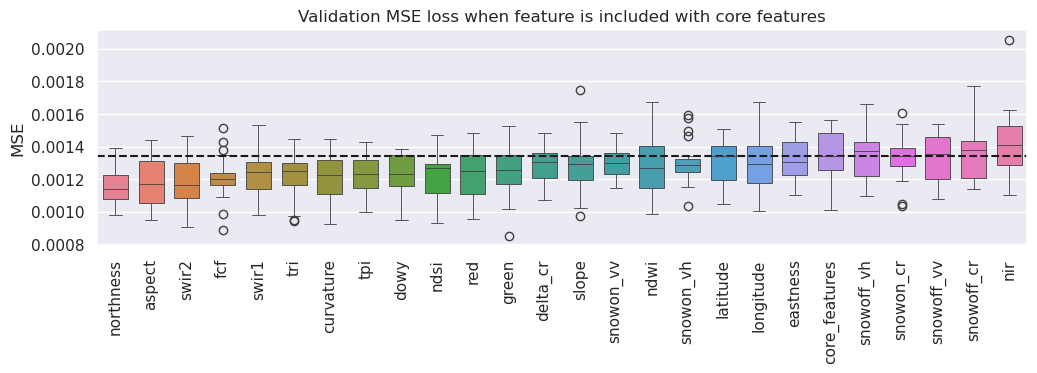

In [70]:
sns.set_theme()
f, ax = plt.subplots(figsize=(12, 2.8))
sns.boxplot(data=r1_df, ax=ax, linewidth=0.6, width=0.7)
#sns.swarmplot(data=df, s=3, ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.axhline(r1_df.core_features.median(), c='k', linestyle='--')
ax.set_ylabel('MSE')
ax.set_title('Validation MSE loss when feature is included with core features')

#plt.savefig('../../figs/addition_MSE_change.png', dpi=400, bbox_inches="tight")

In [82]:
for key, value in experiment_data['r2'].items():
    print(f'{key}, mean: {np.mean(value)}, std: {np.std(value)}')
    stat_val, p_val = ttest_ind(r1_df[r1_df.mean().idxmin()], value, equal_var=False)
    print(p_val)

('green', 'red'), mean: 0.0013085251877782867, std: 0.000172926255332703
0.0025535510623337157
('green', 'swir1'), mean: 0.0012402322558045854, std: 0.00017510718460804156
0.08052931711990788
('green', 'swir2'), mean: 0.001258214341942221, std: 0.00013894195808030027
0.015315181450421898
('green', 'ndsi'), mean: 0.001254605631402228, std: 0.00015720002512568113
0.029625684773596478
('green', 'ndwi'), mean: 0.0012534863533801399, std: 0.00020709653083048223
0.07630344794628882
('green', 'fcf'), mean: 0.0012034119587042368, std: 0.00012203057154705871
0.20323003431075537
('green', 'slope'), mean: 0.0012719582278805318, std: 0.00015194994039729616
0.010024267884907848
('green', 'aspect'), mean: 0.0012416098979883827, std: 0.0001479830329746041
0.047326440576394166
('green', 'northness'), mean: 0.0011914532748050987, std: 0.00015799330232887457
0.409076591844834
('green', 'curvature'), mean: 0.00118141406273935, std: 0.00014222858934302603
0.5186365458267954
('green', 'tri'), mean: 0.00129

In [83]:
dic_for_df = experiment_data['r2']
dic_for_df[('core_features',)] = experiment_data['r0_baseline']

In [84]:
r2_df = pd.DataFrame.from_dict(dic_for_df, orient='index').transpose()
r2_df.columns = [f'{col}' for col in r2_df.columns]
medians = r2_df.median()
sorted_columns = medians.sort_values().index
r2_df = r2_df[sorted_columns]

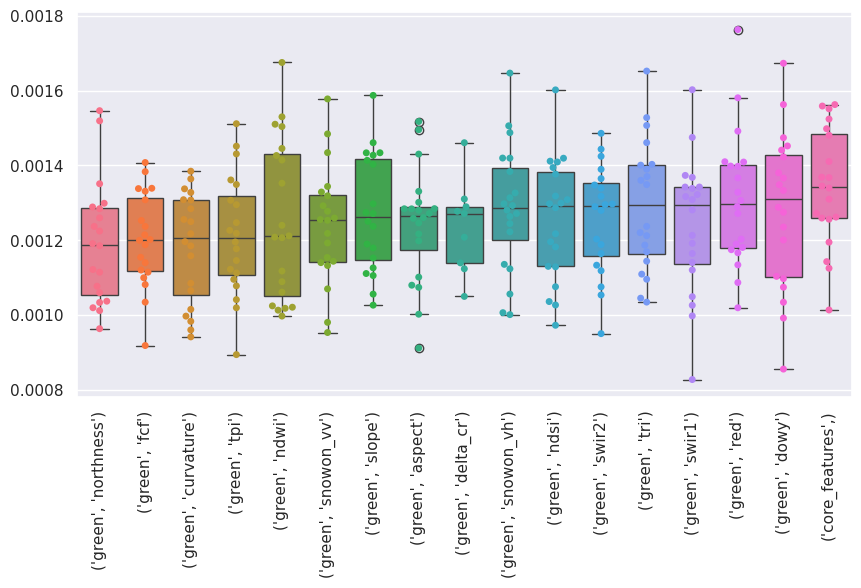

In [85]:
sns.set_theme()
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=r2_df, ax=ax)
sns.swarmplot(data=r2_df, ax=ax)
ax.tick_params(axis='x', rotation=90)
#ax.axhline(df.core_features.median(), c='r')